In [ ]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### Load Dataframe


1.   Load dataset
2.   Remove irrelevant columns
3.   Make an 'Avg' column for mean





In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/Timeseries/Crypto_time'

In [ ]:
btc = pd.read_csv(f'{folder_path}/gemini_BTCUSD_2020_1min.csv')
btc = btc.set_index('Date').sort_values('Date').drop(columns=['Unix Timestamp','Symbol'])
btc['Avg']=btc[['High','Low']].mean(axis=1)
btc

,Open,High,Low,Close,Volume,Avg
Date,,,,,,
1/1/2020 0:00,7165.90,7170.79,7163.30,7163.30,0.007931,7167.045
1/1/2020 0:01,7163.30,7164.23,7163.30,7163.30,0.002646,7163.765
1/1/2020 0:02,7163.30,7164.22,7163.00,7163.00,0.063904,7163.610
1/1/2020 0:03,7163.00,7163.60,7163.00,7163.60,0.002706,7163.300
1/1/2020 0:04,7163.60,7163.60,7163.00,7163.00,1.751844,7163.300
...,...,...,...,...,...,...
9/9/2020 9:55,10183.36,10192.89,10183.36,10190.53,0.014431,10188.125
9/9/2020 9:56,10190.53,10190.53,10190.53,10190.53,0.000000,10190.530
9/9/2020 9:57,10190.53,10190.53,10190.53,10190.53,0.000000,10190.530


### Try Plotting graphs with various means

<Axes: xlabel='Date'>

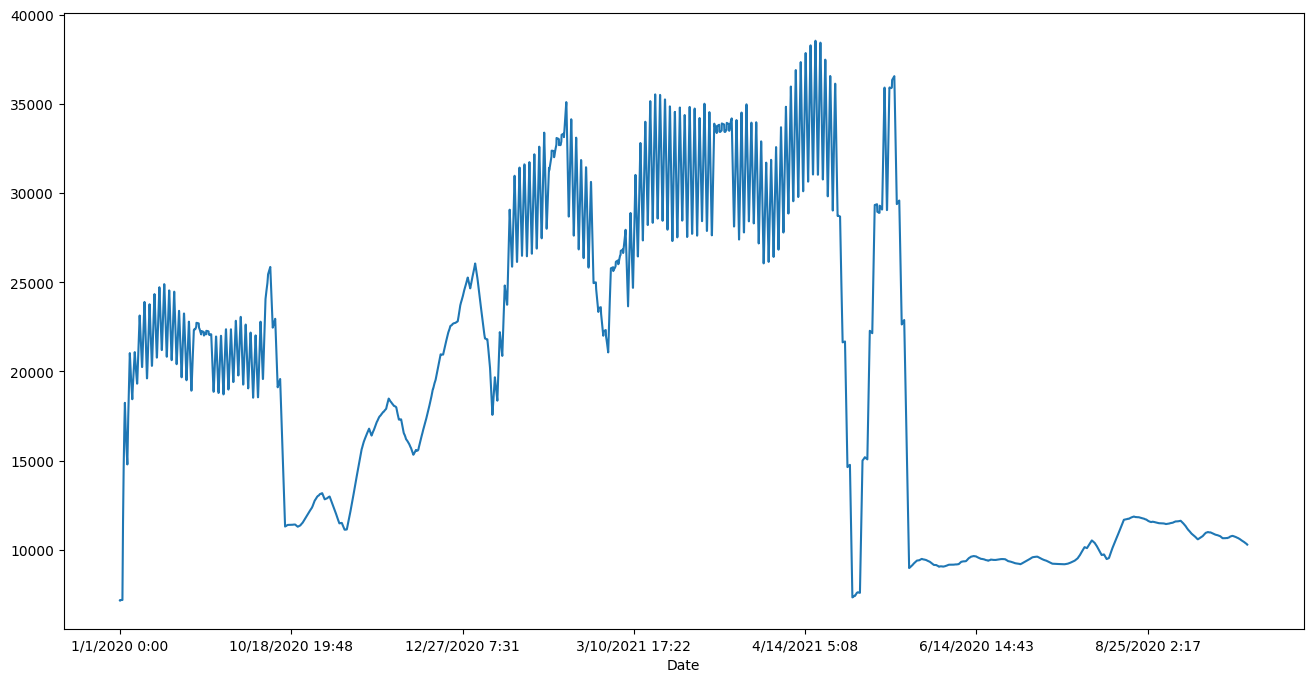

In [ ]:
plt.figure(figsize=(16, 8))
btc.Avg.rolling(10000,min_periods=1).mean().plot.line()

<Axes: xlabel='Date'>

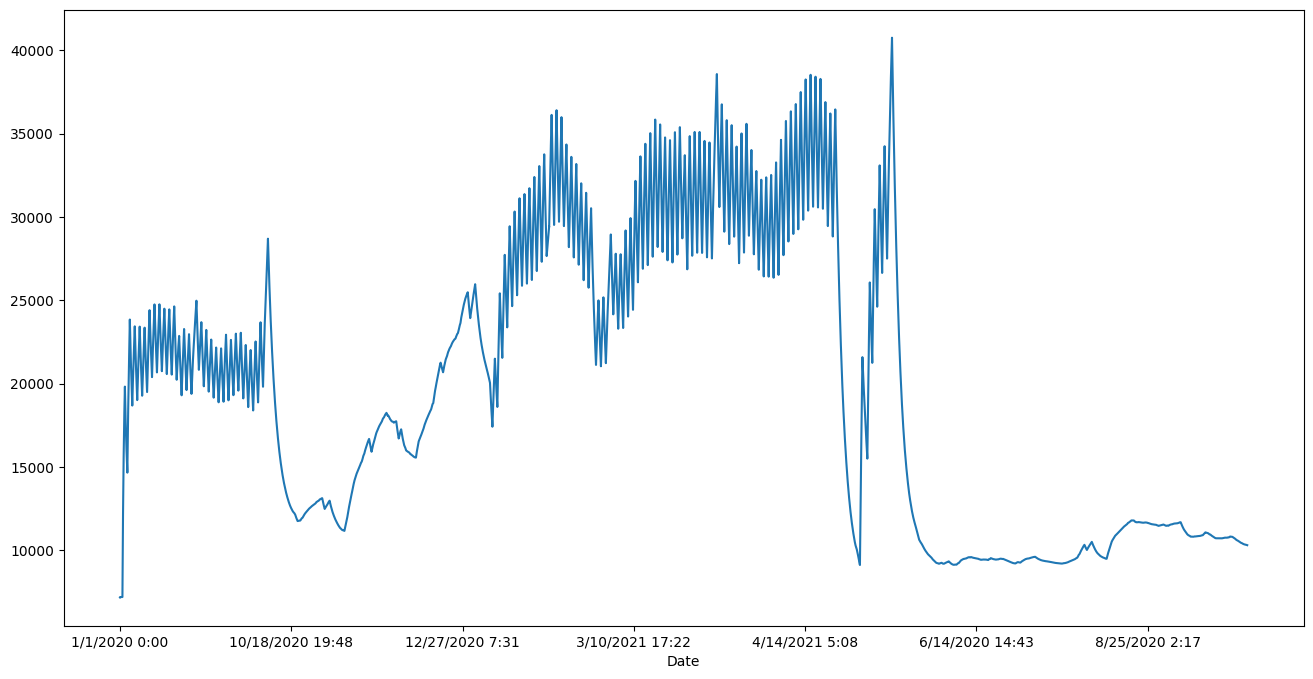

In [ ]:
plt.figure(figsize=(16, 8))
btc.Avg.ewm(alpha=0.0002).mean().plot.line()

In [ ]:
btc['EWM'] = btc.Avg.ewm(alpha=0.005).mean()

### Decompose the time series to view its components
##### We cannot perform this for large size

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

model = seasonal_decompose(btc.Avg, period=10)
model.plot()

KeyboardInterrupt: 

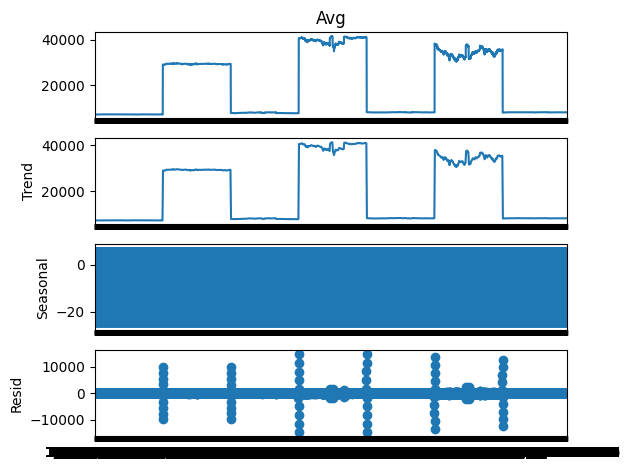

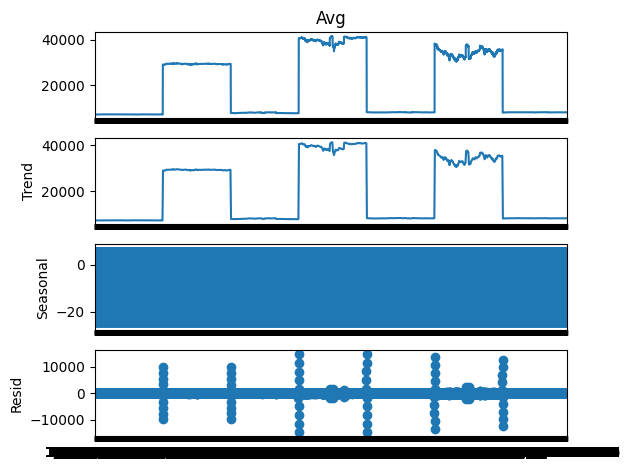

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

model = seasonal_decompose(btc.Avg[:10000], period=10)
model.plot()

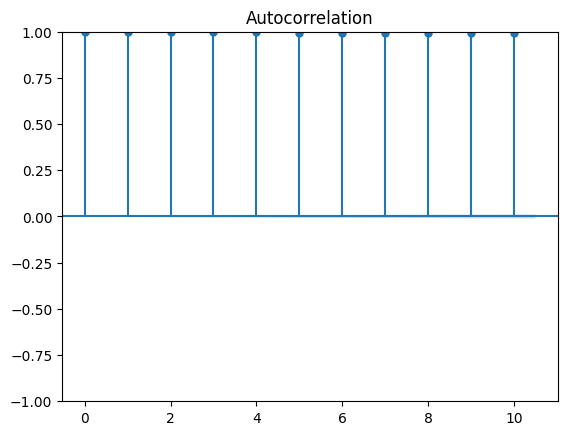

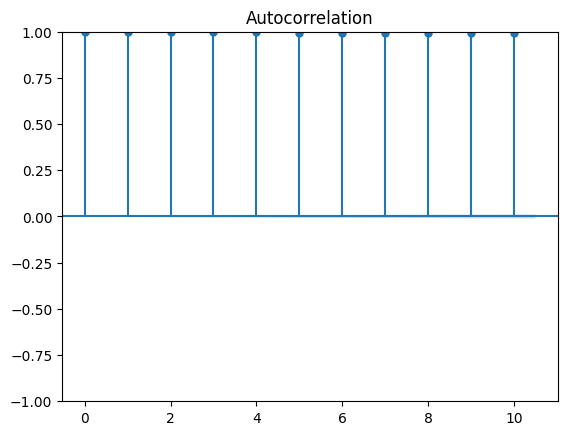

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(btc.Avg, lags=10 )

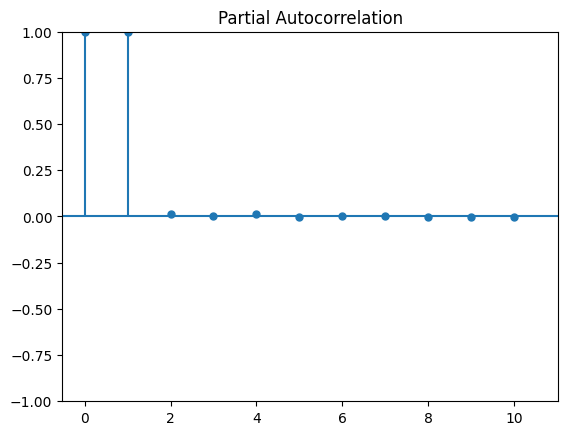

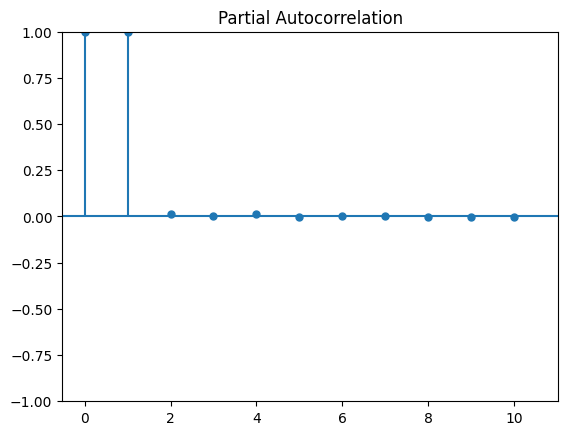

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(btc.Avg, lags=10 )

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(btc.Avg,10)
print("p-value : " , adf[1])

p-value :  3.348679972793965e-30


### As the p value>1.0, this time series is not stationery.
### We now try to difference it

In [ ]:
btc['Avg_Diff'] = btc.Avg - btc.Avg.shift(1)

<Axes: xlabel='Date'>

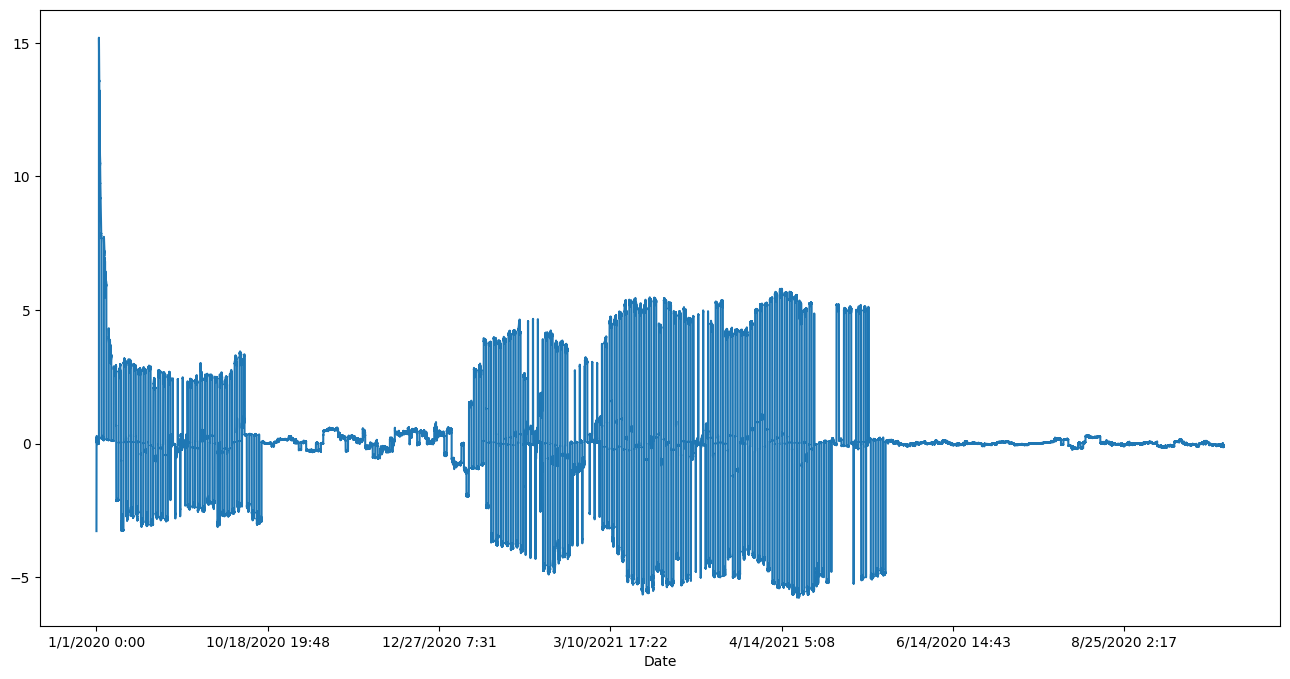

In [ ]:
plt.figure(figsize=(16, 8))
btc.Avg_Diff.rolling(10000,min_periods=1).mean().plot.line()

<Axes: xlabel='Date'>

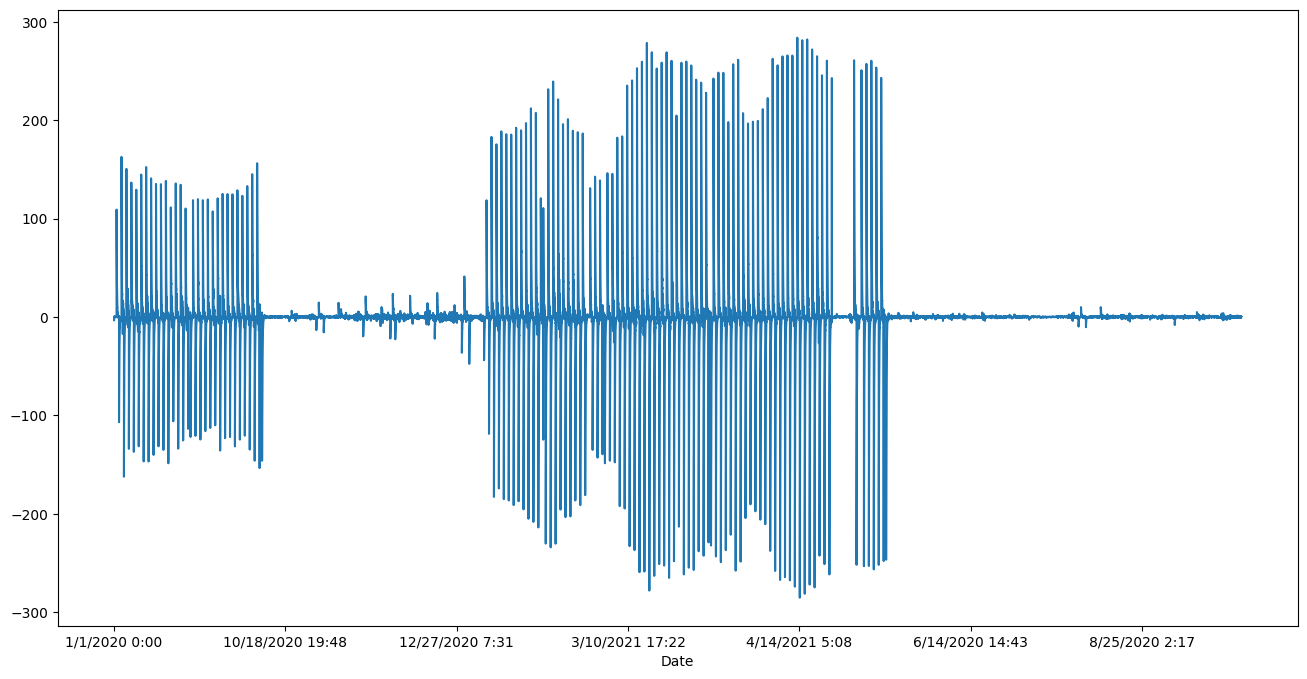

In [ ]:
plt.figure(figsize=(16, 8))
btc.Avg_Diff.ewm(alpha=0.005).mean().plot.line()

#### Decompose the time series to view its components
##### We cannot perform this for large size

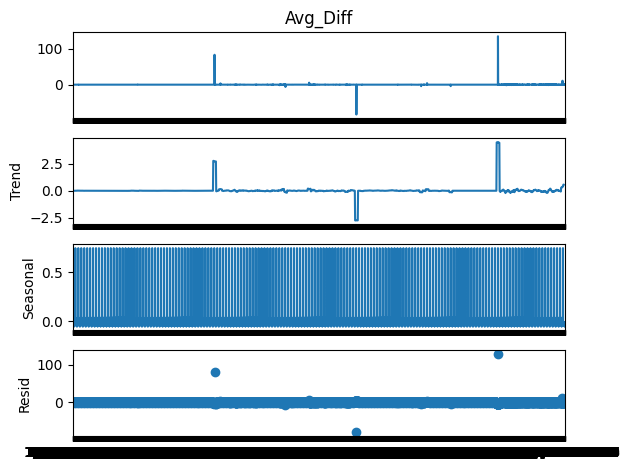

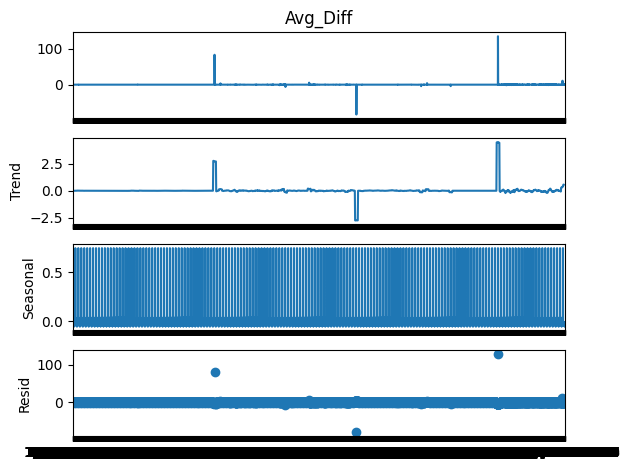

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

model = seasonal_decompose(btc.Avg_Diff[1:5000], period=10)
model.plot()

#### Plot ACF and PACF

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


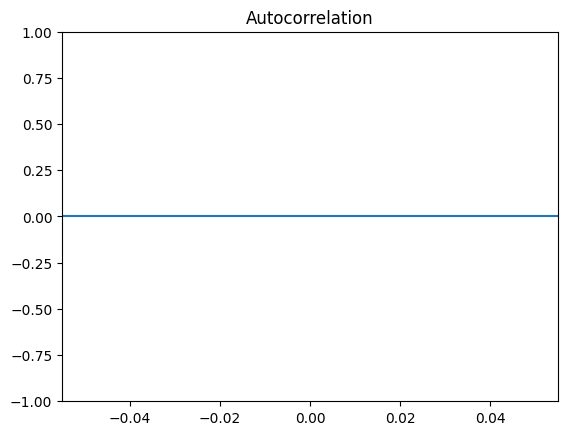

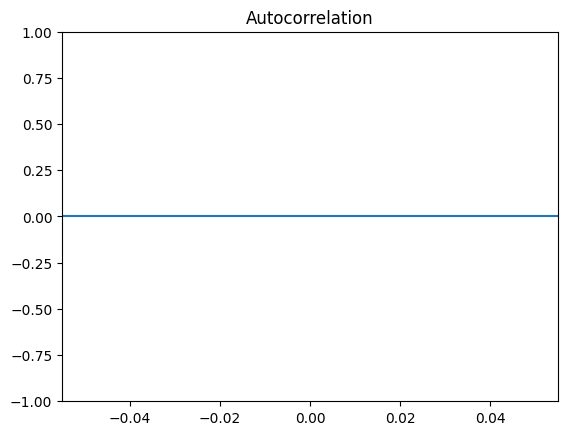

In [ ]:
smt.graphics.plot_acf(btc.Avg_Diff, lags=10)

#### Calculate ADF TEST p value

In [ ]:
adf = adfuller(btc.Avg_Diff[1:],10)
print("p-value : " , adf[1])

p-value :  0.0


### Train ARIMA model
#### As the p value is less than 1.0, we can say that the time series is stationery

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(btc['EWM'][:-100], order=(10,1,0))
results_ARIMA = model.fit()

results_ARIMA.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    EWM   No. Observations:               657965
Model:                ARIMA(10, 1, 0)   Log Likelihood            -1805502.081
Date:                Thu, 22 Feb 2024   AIC                        3611026.162
Time:                        08:06:57   BIC                        3611151.528
Sample:                             0   HQIC                       3611061.253
                             - 657965                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9831      0.000   5522.680      0.000       0.983       0.983
ar.L2          0.0112      0.008      1.350      0.177      -0.005       0.027
ar.L3         -0.0120      0.008     -1.458      0.145      -0.028       0.004
ar.L4          0.0124      0.008      1.538      0.124      -0.003       0.028
ar.L5         -0.0030      0.008     -0.370      0.712      -0.019       0.013
ar.L6          0.0028      0.010      0.269      0.788      -0.018       0.023
ar.L7          0.0003      0.021      0.014      0.989      -0.041       0.042
ar.L8       5.649e-05      0.024      0.002      0.998      -0.047       0.047
ar.L9      -5.713e-05      0.023     -0.002      0.998      -0.045       0.045
ar.L10      5.255e-05      0.017      0.003      0.998      -0.034       0.034
sigma2        14.1580      0.001   2.42e+04      0.000      14.157      14.159
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):      375527716174.59
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                      3704.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted = results_ARIMA.forecast(100)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
predicted.reset_index()['predicted_mean']

0     10125.893975
1     10126.157728
2     10126.420446
3     10126.681915
4     10126.942144
          ...     
95    10145.889945
96    10146.053658
97    10146.216548
98    10146.378620
99    10146.539877
Name: predicted_mean, Length: 100, dtype: float64

#### Calculate RMSE

In [ ]:
predict-actual

0     0.000241
1     0.000813
2     0.000241
3    -0.001665
4    -0.003467
        ...   
95    0.671848
96    0.609001
97    0.546464
98    0.484236
99    0.407240
Length: 100, dtype: float64

In [ ]:
predict = predicted.reset_index()['predicted_mean']
actual = btc.EWM[-100:].reset_index()['EWM']

mse = np.mean(np.abs(predict - actual)**2)
rmse = np.sqrt(mse)
rmse

1.8065355248539945